In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("wine_fraud.csv")

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Legit,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,Legit,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,Legit,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,Legit,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,Legit,white


In [4]:
#EXPLORATORY DATA ANALYSIS

In [5]:
df['quality'].value_counts()

Legit    6251
Fraud     246
Name: quality, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   object 
 12  type                  6497 non-null   object 
dtypes: float64(11), object(2)
memory usage: 660.0+ KB


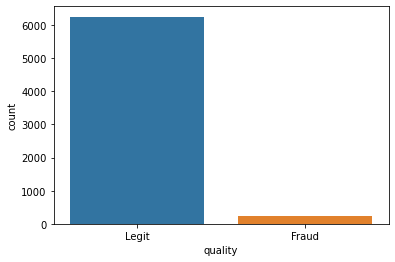

In [7]:
# TO CHECK UNBALANCED DATA
sns.countplot(data=df, x='quality')

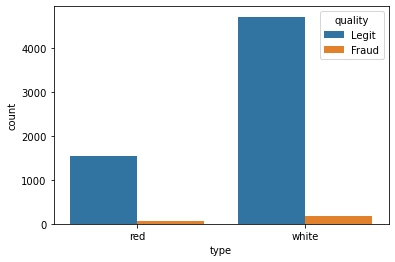

In [8]:
# BASED ON CATAGORY
sns.countplot(data=df,x='type',hue='quality')

In [9]:
#CALCULATING PERCENTAGE OF FRAUD
fraud_rw=len(df[(df['type']=='red') & (df['quality']=='Fraud')])
n=len(df[df['type']=='red'])
percent_fraud_rw=(fraud_rw/n)*100
print('Percentage fraud in red wines\n')
print(percent_fraud_rw)

Percentage fraud in red wines

3.9399624765478425


In [11]:
# COLUMN WISE CORRELATION
cols=[]
corr_val=[]
#new['quality']=pd.get_dummies(new['quality'])
df['quality']=pd.get_dummies(df['quality'])
#new=df.drop('type',axis=1)
for i in list(df.columns):
#new['fixed acidity'].corr(new['quality'])
    print(i,"  ",df[i].corr(df['quality']))
    cols.append(i)
    corr_val.append(df[i].corr(df['quality']))

fixed acidity    -0.02179396477544177
volatile acidity    -0.15122797591692885
citric acid    0.061789459648024944
residual sugar    0.04875595622089079
chlorides    -0.03449946437447282
free sulfur dioxide    0.08520432915929753
total sulfur dioxide    0.03525239569530775
density    -0.016351283920055963
pH    -0.020107271414856992
sulphates    0.03404620619711477
alcohol    0.05114073644168675
quality    0.9999999999999999


TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [12]:
corr_val=np.round(corr_val,6)
corr_val

array([-0.021794, -0.151228,  0.061789,  0.048756, -0.034499,  0.085204,
        0.035252, -0.016351, -0.020107,  0.034046,  0.051141,  1.      ])

In [67]:
# CORRELATION BAR PLOT
new_df=pd.DataFrame(data=corr_val,index=cols)
new_df.columns=['harsh']
new_df
new_df=new_df.sort_values('harsh')
new_df.min()

harsh   -0.151228
dtype: float64

(-0.2, 0.3)

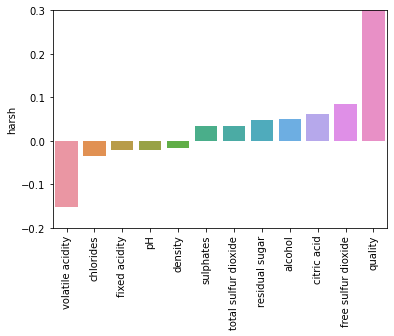

In [78]:
sns.barplot(x=new_df.index,y=new_df['harsh'])
plt.xticks(rotation=90)
plt.ylim(-0.2,0.3)

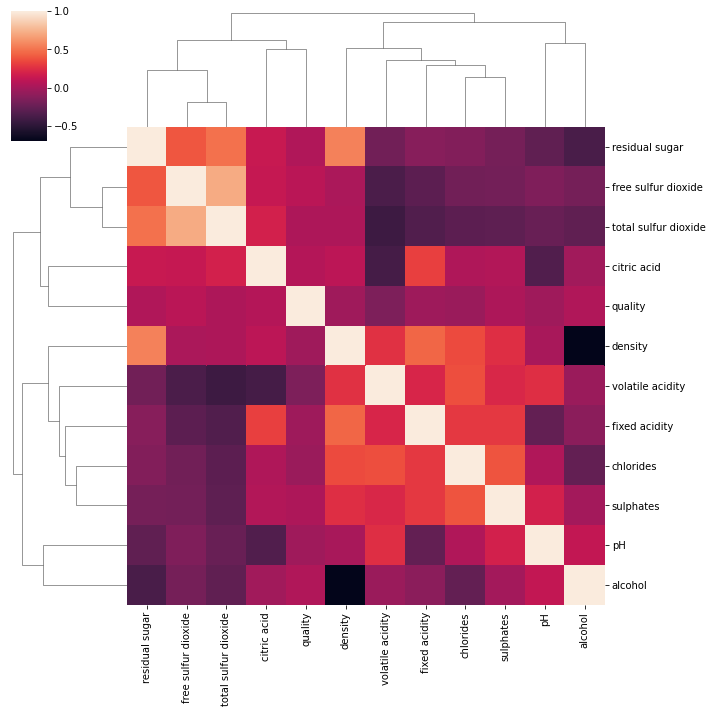

In [80]:
# CORRELATION CLUSTERMAP
sns.clustermap(df.corr())

In [81]:
# CONVERTING CATAGORICAL TO NUMERIC
df=pd.get_dummies(df)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_red,type_white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1,1,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1,1,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1,1,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1,1,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1,0,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,1,0,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1,0,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1,0,1


In [83]:
df=df.drop('type_red',axis=1)

In [84]:
df=df.drop('type_white',axis=1)

In [85]:
#DATA PREPROCESSING
X=df.drop('quality',axis=1)

In [86]:
y=df['quality']

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [89]:
from sklearn.preprocessing import StandardScaler

In [90]:
scaler=StandardScaler()

In [91]:
scaled_X_train=scaler.fit_transform(X_train)

In [92]:
scaled_X_test=scaler.transform(X_test)

In [93]:
# MODEL TRAINING
from sklearn.svm import SVC

In [110]:
model=SVC(class_weight='balanced')

In [111]:
# GRID SEARCH
param_grid={'C':[0.01,0.1,1,2,5],'kernel':['linear', 'poly', 'rbf'],'gamma':['scale','auto']}

In [112]:
from sklearn.model_selection import GridSearchCV

In [113]:
grid_model=GridSearchCV(model,param_grid,cv=3,verbose=1)

In [114]:
grid_model.fit(scaled_X_train,y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:  1.9min finished


GridSearchCV(cv=3, estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.01, 0.1, 1, 2, 5], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']},
             verbose=1)

In [115]:
grid_model.best_params_

{'C': 0.01, 'gamma': 'scale', 'kernel': 'poly'}

In [116]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [117]:
preds=grid_model.predict(scaled_X_test)

In [118]:
confusion_matrix(y_test,preds)

array([[ 12,  15],
       [ 37, 586]], dtype=int64)

In [119]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.24      0.44      0.32        27
           1       0.98      0.94      0.96       623

    accuracy                           0.92       650
   macro avg       0.61      0.69      0.64       650
weighted avg       0.94      0.92      0.93       650



In [ ]:
# MODEL PERFORMANCE DECENT.